In [369]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [379]:
df = pd.read_csv('df_post_eda.csv', index_col=0) 
#index_col = 0 drops that Unnamed: 0 column

In [380]:
df.head()

,y,Class,Sex,Age,SibSp,ParCh,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [381]:
df = pd.get_dummies(data=df,drop_first=True).copy()

In [382]:
df ##convert Class to dummies 

,y,Class,Age,SibSp,ParCh,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,0
888,0,3,NaN,1,2,23.4500,0
889,1,1,26.0,0,0,30.0000,1


In [383]:
Class_dummies = pd.get_dummies(data=df["Class"], prefix='Class', drop_first='True')

In [384]:
df = df.join(Class_dummies).copy()

In [385]:
df = df.drop(['Class'], axis=1).copy()

In [386]:
df.head(0)

,y,Age,SibSp,ParCh,Fare,Sex_male,Class_2,Class_3


In [387]:
df.to_csv('for_impute.csv', index=False)

# Drop NaN

Will use Miss Forest to impute later

In [86]:
df = df.dropna().copy()

In [87]:
df.shape

(714, 8)

C:\Users\euana\AppData\Local\Temp\ipykernel_24460\2301651827.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  sns.heatmap(df[{'y', 'Class_2', 'Class_3', 'Fare'}].corr(),


<AxesSubplot:>

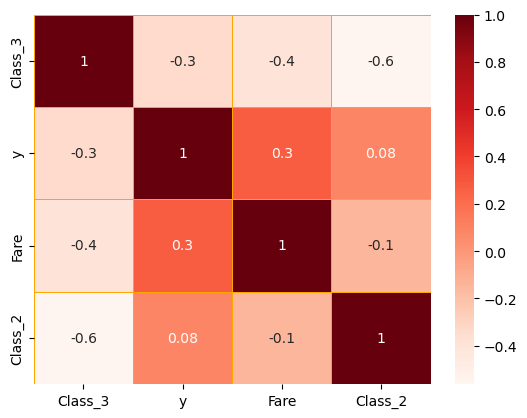

In [88]:
sns.heatmap(df[{'y', 'Class_2', 'Class_3', 'Fare'}].corr(),
           annot = True,
           linewidth = 0.65,
           linecolor='orange',
           cmap='Reds',
           fmt='.1g')

# Logistic Regression

In [67]:
y = df.y.copy()
x = df.drop('y', axis = 1)
x = sm.add_constant(x)

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.2,
                                                    random_state = 1502)

In [69]:
y_train

414    1
706    1
276    0
882    0
616    0
      ..
779    1
559    1
66     1
143    0
588    0
Name: y, Length: 571, dtype: int64

In [70]:
model = sm.Logit(y_train, x_train).fit()

Optimization terminated successfully.
         Current function value: 0.454162
         Iterations 6


In [71]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  571
Model:                          Logit   Df Residuals:                      563
Method:                           MLE   Df Model:                            7
Date:                Thu, 22 Jun 2023   Pseudo R-squ.:                  0.3242
Time:                        20:45:27   Log-Likelihood:                -259.33
converged:                       True   LL-Null:                       -383.71
Covariance Type:            nonrobust   LLR p-value:                 5.047e-50
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2443        nan        nan        nan         nan         nan
Class         -0.2903        nan        nan        nan         nan         nan
Age           -0.0422      0.009     -4.688      0.000      -0.060      -0.025
SibSp         -0.3728      0.141     -2.638      0.008      -0.650      -0.096
ParCh          0.0163      0.141      0.116      0.908      -0.259       0.292
Fare           0.0015      0.003      0.496      0.620      -0.004       0.007
Sex_male      -2.5689      0.241    -10.655      0.000      -3.041      -2.096
Class_2       -1.0437        nan        nan        nan         nan         nan
Class_3       -1.7455        nan        nan        nan         nan         nan
==============================================================================
"""

Interpretation of model

In [72]:
res = model.summary().tables[1]
res_html = res.as_html()
res_df = pd.read_html(res_html, header = 0, index_col = 0)[0]
res_df

,coef,std err,z,P>|z|,[0.025,0.975]
const,4.2443,NaN,NaN,NaN,NaN,NaN
Class,-0.2903,NaN,NaN,NaN,NaN,NaN
Age,-0.0422,0.009,-4.688,0.000,-0.060,-0.025
SibSp,-0.3728,0.141,-2.638,0.008,-0.650,-0.096
ParCh,0.0163,0.141,0.116,0.908,-0.259,0.292
Fare,0.0015,0.003,0.496,0.620,-0.004,0.007
Sex_male,-2.5689,0.241,-10.655,0.000,-3.041,-2.096
Class_2,-1.0437,NaN,NaN,NaN,NaN,NaN
Class_3,-1.7455,NaN,NaN,NaN,NaN,NaN


In [73]:
coef_df = res_df.loc[res_df['P>|z|'] < 0.05, ['coef']]
coef_df['Probability'] = round((np.exp(coef_df['coef']) - 1) * 100, 2)
coef_df

,coef,Probability
Age,-0.0422,-4.13
SibSp,-0.3728,-31.12
Sex_male,-2.5689,-92.34


# Assessing the model

In [114]:
predictions = model.predict(x_test)
predictions = np.where(predictions > 0.5, 1, 0)
predictions

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0])

Is the dataset balanced?

In [90]:
y_test.mean()

0.4405594405594406

# Confusion matrix 

In [91]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)
#TN,FP, FN, TP

array([[70, 10],
       [15, 48]], dtype=int64)

In [92]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [93]:
tn, tp, fp, fn

(70, 48, 10, 15)

## Accuracy

In [108]:
acc = round(((tp + tn) / (tp + tn + fp + fn)) * 100 , 2)

f1 = round((2 * tp / (2 * tp + fp + fn)) * 100, 2)

specifity = round((tn / (tn + fp))*100, 2)

sensitivity = round((tp / (tp + fn))*100, 2)

In [109]:
print(f"Accuracy is {acc}%\nF1-score is {f1}%\nSpecificity is {specifity}%\nSensitivity is {sensitivity}%")

Accuracy is 82.52%
F1-score is 79.34%
Specificity is 87.5%
Sensitivity is 76.19%


# Classification report

In [96]:
from sklearn.metrics import classification_report

In [97]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        80
           1       0.83      0.76      0.79        63

    accuracy                           0.83       143
   macro avg       0.83      0.82      0.82       143
weighted avg       0.83      0.83      0.82       143



# Creating submission CSV

## Training data

In [171]:
train = df.copy()

In [172]:
train_y = train.y

In [173]:
train.columns

Index(['y', 'Age', 'SibSp', 'ParCh', 'Fare', 'Sex_male', 'Class_2', 'Class_3'], dtype='object')

In [174]:
predictors_cols = ['Age', 'SibSp', 'ParCh', 'Fare', 'Sex_male', 'Class_2', 'Class_3']

In [175]:
train_X = train[predictors_cols]

In [176]:
my_model = sm.Logit(train_y, train_X).fit()

Optimization terminated successfully.
         Current function value: 0.499808
         Iterations 6


## Test data

In [441]:
test = pd.read_csv('test.csv')

In [442]:
test.shape

(418, 11)

In [443]:
test = test[['PassengerId', 'Pclass', 
    #'Name', 
    'Sex', 'Age', 'SibSp','Parch',
    #'Ticket', 
    'Fare', 
    #'Cabin', 'Embarked'
   ]].copy()

In [444]:
test = test.rename(columns={'Pclass' : 'Class',
                   'Parch': 'ParCh'}).copy()

In [445]:
test = test.astype({'Class': 'category', 'Sex': 'category'}).copy()

In [446]:
test = pd.get_dummies(data=test,drop_first=True).copy()

In [349]:
#test = test.dropna().copy()
#drop na for submission two

In [447]:
test.isna().sum()

PassengerId     0
Age            86
SibSp           0
ParCh           0
Fare            1
Class_2         0
Class_3         0
Sex_male        0
dtype: int64

In [448]:
train_X.head(0), test.head(0)

(Empty DataFrame
 Columns: [Age, SibSp, ParCh, Fare, Sex_male, Class_2, Class_3]
 Index: [],
 Empty DataFrame
 Columns: [PassengerId, Age, SibSp, ParCh, Fare, Class_2, Class_3, Sex_male]
 Index: [])

In [450]:
test.to_csv('test_for_imputation.csv', index=False)

In [354]:
test_X = test[predictors_cols]

In [355]:
predicted = my_model.predict(test_X)
predicted = (round(predicted, 0))

In [356]:
print(predicted)

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
409    0.0
411    1.0
412    1.0
414    1.0
415    0.0
Length: 331, dtype: float64


In [357]:
type(predicted)

pandas.core.series.Series

In [358]:
test['Survived'] = predicted

In [359]:
test.head()

,PassengerId,Age,SibSp,ParCh,Fare,Class_2,Class_3,Sex_male,Survived
0,892,34.5,0,0,7.8292,0,1,1,0.0
1,893,47.0,1,0,7.0000,0,1,0,1.0
2,894,62.0,0,0,9.6875,1,0,1,0.0
3,895,27.0,0,0,8.6625,0,1,1,0.0
4,896,22.0,1,1,12.2875,0,1,0,0.0


In [360]:
test = test[['PassengerId', 
                    #'Age', 'SibSp', 
                    #'ParCh', 'Fare', 
                    #'Class_2', 'Class_3',
                   #'Sex_male', 
                    'Survived']].copy()

In [364]:
test = test.astype({'Survived': 'int64'})

In [367]:
test

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
409,1301,0
411,1303,1
412,1304,1
414,1306,1


In [368]:
test.to_csv('thirdsubmission.csv', index=False)

# Model using KNN imputed values

In [495]:
df_knn = pd.read_csv('KNN_imputed.csv')

## KNN model

In [513]:
y = df_knn.y.copy()
x = df_knn.drop('y', axis = 1)
x = sm.add_constant(x)
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.2,
                                                    random_state = 1502)
knn_model = sm.Logit(y_train, x_train).fit()
x.shape

Optimization terminated successfully.
         Current function value: 0.434901
         Iterations 6


(891, 8)

## Assess KNN model

In [497]:
def assess_model(m):
    res = m.summary().tables[1]
    res_html = res.as_html()
    res_df = pd.read_html(res_html, header = 0, index_col = 0)[0]
    coef_df = res_df.loc[res_df['P>|z|'] < 0.05, ['coef']]
    coef_df['Probability'] = round((np.exp(coef_df['coef']) - 1) * 100, 2)
    coef_df
    balance = y_test.mean()
    predictions = model.predict(x_test)
    predictions = np.where(predictions > 0.5, 1, 0)
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    acc = round(((tp + tn) / (tp + tn + fp + fn)) * 100 , 2)
    f1 = round((2 * tp / (2 * tp + fp + fn)) * 100, 2)
    specifity = round((tn / (tn + fp))*100, 2)
    sensitivity = round((tp / (tp + fn))*100, 2)
    print(model.summary().tables[0])
    print(coef_df)
    print(balance) 
    return print(f"Accuracy is {acc}%\nF1-score is {f1}%\nSpecificity is {specifity}%\nSensitivity is {sensitivity}%")

In [498]:
assess_model(knn_model)

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  712
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            7
Date:                Sat, 24 Jun 2023   Pseudo R-squ.:                  0.3467
Time:                        10:58:19   Log-Likelihood:                -309.65
converged:                       True   LL-Null:                       -473.99
Covariance Type:            nonrobust   LLR p-value:                 4.489e-67
            coef  Probability
const     4.3316      7506.59
Age      -0.0488        -4.76
SibSp    -0.4171       -34.10
Sex_male -2.7328       -93.50
Class_2  -1.2687       -71.88
Class_3  -2.4095       -91.01
0.3854748603351955
Accuracy is 79.33%
F1-score is 70.87%
Specificity is 88.18%
Sensitivity is 65.22%


# Model using Miss Forest values

In [502]:
df_mf = pd.read_csv('MF_imputed.csv')

## Miss Forest model

In [503]:
y = df_mf.y.copy()
x = df_mf.drop('y', axis = 1)
x = sm.add_constant(x)
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.2,
                                                    random_state = 1502)
mf_model = sm.Logit(y_train, x_train).fit()

Optimization terminated successfully.
         Current function value: 0.434655
         Iterations 6


## Assess Miss Forest model

In [504]:
assess_model(mf_model)

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  712
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            7
Date:                Sat, 24 Jun 2023   Pseudo R-squ.:                  0.3467
Time:                        11:00:16   Log-Likelihood:                -309.65
converged:                       True   LL-Null:                       -473.99
Covariance Type:            nonrobust   LLR p-value:                 4.489e-67
            coef  Probability
const     4.3566      7699.15
Age      -0.0491        -4.79
SibSp    -0.4544       -36.52
Sex_male -2.7244       -93.44
Class_2  -1.2974       -72.68
Class_3  -2.4363       -91.25
0.3854748603351955
Accuracy is 79.33%
F1-score is 70.4%
Specificity is 89.09%
Sensitivity is 63.77%


# Submissions with imputed values

In [479]:
test_KNN = pd.read_csv('test_KNN_imputed.csv')
test_MF = pd.read_csv('test_MF_imputed.csv')

In [480]:
test_KNN.head(0)

,PassengerId,Age,SibSp,ParCh,Fare,Class_2,Class_3,Sex_male


In [481]:
test_KNN.dtypes

PassengerId    float64
Age            float64
SibSp          float64
ParCh          float64
Fare           float64
Class_2        float64
Class_3        float64
Sex_male       float64
dtype: object

## KNN

In [518]:
def myfunc_2(d):
    test_X = d[predictors_cols]
    test_X = sm.add_constant(test_X)
    predicted = mf_model.predict(test_X)
    predicted = (round(predicted, 0))
    d['Survived'] = predicted
    test = d[['PassengerId', 
                        #'Age', 'SibSp', 
                        #'ParCh', 'Fare', 
                        #'Class_2', 'Class_3',
                       #'Sex_male', 
                        'Survived']].copy()
    test = test.astype({'Survived': 'int64', 'PassengerId': 'int32'})
    test
    return test.to_csv('MF_trained_KNN_test_submission.csv', index=False)

In [519]:
myfunc_2(test_KNN)

In [520]:
temp = pd.read_csv('MF_trained_KNN_test_submission.csv')

In [521]:
temp.shape

(418, 2)

In [522]:
temp.dtypes

PassengerId    int64
Survived       int64
dtype: object

## MF

In [525]:
def myfunc_2(d):
    test_X = d[predictors_cols]
    test_X = sm.add_constant(test_X)
    predicted = knn_model.predict(test_X)
    predicted = (round(predicted, 0))
    d['Survived'] = predicted
    test = d[['PassengerId', 
                        #'Age', 'SibSp', 
                        #'ParCh', 'Fare', 
                        #'Class_2', 'Class_3',
                       #'Sex_male', 
                        'Survived']].copy()
    test = test.astype({'Survived': 'int64', 'PassengerId': 'int32'})
    test
    return test.to_csv('KNN_trained_MF_test_submission.csv', index=False)

In [526]:
myfunc_2(test_MF)

In [527]:
temp = pd.read_csv('KNN_trained_MF_test_submission.csv')

In [528]:
temp.shape

(418, 2)

In [529]:
temp.dtypes

PassengerId    int64
Survived       int64
dtype: object